In [ ]:
# Find PRAD markers

In [12]:
import pandas as pd
import numpy as np
from collections import Counter
import pickle
from core.gcloud.file import opener
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
probes_to_keep_bool = pickle.load(open("/home/billiegould/src/Methyl/TCGA/probes_to_keep_bool.pkl","rb")) # a bool vector

sample_metadata = []
data_dfs = []
bad_files = []
i=0

cancers = ["edu_PRAD",
           'edu_LUAD',
           'edu_PAAD',
           'edu_BRCA',
           'edu_LIHC',
           'edu_LUSC',
           'edu_OV',
           'edu_COAD',
           'edu_READ']

    
with open("/home/billiegould/src/Methyl/TCGA/nonCRC_analysis/Healthy_file_paths_TCGA.txt","r") as fin:
    for path in fin.readlines():
        
        i += 1
        #print(path)
        # jhu-usc.edu_LUAD.HumanMethylation450.1.lvl-3.TCGA-44-2655-11A-01D-1551-05.gdc_hg38.txt
        # parse metadata
        try:
            study = path.split("/")[-1].split(".")[1].split("_")[-1]
            #assert study in ["COAD", "READ"], f"error: study: {study}"

            identifier = path.split("/")[-1].split(".")[-3]
            assert identifier.split("-")[0] == "TCGA"

            tissue_source_site = identifier.split("-")[1]
            assert len(tissue_source_site)==2, f"error: TSS: {tissue_source_site}"

            participant = identifier.split("-")[2]
            assert len(participant)==4, f"error: participant: {participant}"

            sample = identifier.split("-")[3][0:-1]
            assert len(sample)==2, f"error: sample: {sample}"
            #sample_type = sample_code_to_class[sample]

            plate = identifier.split("-")[5]
            assert len(plate)==4, f"error: plate: {plate}"

            center = identifier.split("-")[6]
            assert len(center)==2, f"error: center: {center}"

            sample_metadata.append({"identifier":identifier,
                               "tss":tissue_source_site,
                               "participant":participant,
                               #"sample_type":sample_type,
                               "plate":plate,
                               "center":center,
                               "study":study})
            #print(sample_metadata)
        except AssertionError:
            bad_files.append(path)
            print(f"weird metadata: skipping {path}")
            continue

        if study == "PRAD":
            # read in data file
            infile = opener(path.strip())
            #print(infile.read(128))
            df_data = pd.read_csv(infile, sep="\t")

            try:
                assert df_data.shape == (485577, 11)
                assert list(df_data["Composite Element REF"][0:2]) == ["cg00000029", "cg00000108"] #check the probe order
                assert list(df_data["Composite Element REF"][-2:]) == ["rs966367", "rs9839873"]
            except:
                bad_files.append(path)
                print(f"wrong probe order: skipping {path}")
                continue

            df_data = df_data.set_index("Composite Element REF")
            df_data = df_data.loc[probes_to_keep_bool, ["Beta_value"]]
            df_data.columns = [identifier]
            data_dfs.append(df_data)

            print(f"{i} : {identifier} complete.")


    df_cancer = pd.concat(data_dfs, axis=1)
    print(df_cancer.head())
    print(df_cancer.shape)

    pickle.dump(df_cancer, open(f"./df_Healthy_PRAD_raw_beta_vals.pkl", "wb"))  
    pickle.dump(sample_metadata, open(f"./Healthy_PRAD_sample_metadata.pkl", "wb"))
    
    

15 : TCGA-G9-6499-11A-02D-1963-05 complete.
18 : TCGA-G9-6356-11A-01D-1787-05 complete.
22 : TCGA-EJ-7331-11A-01D-2116-05 complete.
26 : TCGA-G9-6332-11A-01D-1787-05 complete.
33 : TCGA-CH-5768-11A-01D-1578-05 complete.
36 : TCGA-CH-5766-11A-01D-1578-05 complete.
40 : TCGA-G9-6385-11A-01D-1787-05 complete.
42 : TCGA-EJ-7123-11A-01D-1963-05 complete.
44 : TCGA-G9-6333-11A-01D-1963-05 complete.
52 : TCGA-G9-6373-11A-01D-1787-05 complete.
66 : TCGA-HC-7211-11A-01D-2116-05 complete.
67 : TCGA-HC-7745-11A-01D-2116-05 complete.
68 : TCGA-G9-6364-11A-01D-1787-05 complete.
81 : TCGA-G9-6353-11A-02D-1963-05 complete.
103 : TCGA-CH-5765-11A-01D-1578-05 complete.
113 : TCGA-HC-7737-11A-02D-2116-05 complete.
123 : TCGA-EJ-7781-11A-01D-2116-05 complete.
139 : TCGA-G9-6363-11A-01D-1787-05 complete.
144 : TCGA-HC-7742-11A-01D-2116-05 complete.
147 : TCGA-EJ-7125-11A-01D-1963-05 complete.
152 : TCGA-CH-5772-11A-01D-1578-05 complete.
158 : TCGA-G9-6365-11A-01D-1787-05 complete.
176 : TCGA-HC-7820-11A-0

In [3]:
probe_metadata = pickle.load(open("./df_keep_probes_metadata.pkl","rb"))


In [9]:
print(probe_metadata.shape)
print(df_cancer.shape)

(465923, 9)
(465923, 23)


In [10]:
probe_metadata.head()


,Chromosome,Start,End,Gene_Symbol,Gene_Type,Transcript_ID,Position_to_TSS,CGI_Coordinate,Feature_Type
Composite Element REF,,,,,,,,,
cg00000029,chr16,53434200,53434201,RBL2;RBL2;RBL2,protein_coding;protein_coding;protein_coding,ENST00000262133.9;ENST00000544405.5;ENST000005...,-221;-1420;222,CGI:chr16:53434489-53435297,N_Shore
cg00000108,chr3,37417715,37417716,C3orf35;C3orf35;C3orf35;C3orf35;C3orf35;C3orf3...,lincRNA;lincRNA;lincRNA;lincRNA;lincRNA;lincRN...,ENST00000328376.8;ENST00000332506.6;ENST000004...,18552;18552;6505;31445;18143;447;18552;18552,CGI:chr3:37451927-37453047,.
cg00000109,chr3,172198247,172198248,FNDC3B;FNDC3B;FNDC3B;FNDC3B;FNDC3B;FNDC3B,protein_coding;protein_coding;protein_coding;p...,ENST00000336824.7;ENST00000415807.5;ENST000004...,157692;158618;151333;71272;158587;71273,CGI:chr3:172039703-172040934,.
cg00000165,chr1,90729117,90729118,.,.,.,.,CGI:chr1:90724932-90727247,S_Shore
cg00000236,chr8,42405776,42405777,VDAC3,protein_coding,ENST00000022615.7,13872,CGI:chr8:42410918-42411241,.


In [11]:
probe_metadata.tail()


,Chromosome,Start,End,Gene_Symbol,Gene_Type,Transcript_ID,Position_to_TSS,CGI_Coordinate,Feature_Type
Composite Element REF,,,,,,,,,
cg27665860,chr11,69203206,69203207,.,.,.,.,CGI:chr11:69157222-69157489,.
cg27665925,chr19,11988091,11988092,CTD-2006C1.2;CTD-2006C1.2;CTD-2006C1.2;CTD-200...,processed_transcript;processed_transcript;proc...,ENST00000406892.5;ENST00000476474.4;ENST000004...,473;411;419;434;434;323,CGI:chr19:11987756-11988135,Island
cg27665985,chr15,65824389,65824390,RAB11A;RAB11A;RAB11A,protein_coding;protein_coding;protein_coding,ENST00000563580.4;ENST00000568850.4;ENST000005...,31941;31941;98334,CGI:chr15:65791501-65792587,.
cg27666046,chr17,82321201,82321202,SECTM1,protein_coding,ENST00000269389.6,12798,CGI:chr17:82320985-82321219,Island
cg27666123,chr5,127652337,127652338,CTC-548H10.2;CTXN3;CTXN3;CTXN3,antisense;protein_coding;protein_coding;protei...,ENST00000512352.1;ENST00000379445.6;ENST000003...,11693;3292;-713;-679,CGI:chr5:127517601-127518233,.


In [13]:
#df_cancer.set_index("Composite Element REF")

df_met = df_cancer.join(probe_metadata[["Chromosome","Start","End"]])


In [14]:
df_met.head()


,TCGA-G9-6499-11A-02D-1963-05,TCGA-G9-6356-11A-01D-1787-05,TCGA-EJ-7331-11A-01D-2116-05,TCGA-G9-6332-11A-01D-1787-05,TCGA-CH-5768-11A-01D-1578-05,TCGA-CH-5766-11A-01D-1578-05,TCGA-G9-6385-11A-01D-1787-05,TCGA-EJ-7123-11A-01D-1963-05,TCGA-G9-6333-11A-01D-1963-05,TCGA-G9-6373-11A-01D-1787-05,...,TCGA-EJ-7781-11A-01D-2116-05,TCGA-G9-6363-11A-01D-1787-05,TCGA-HC-7742-11A-01D-2116-05,TCGA-EJ-7125-11A-01D-1963-05,TCGA-CH-5772-11A-01D-1578-05,TCGA-G9-6365-11A-01D-1787-05,TCGA-HC-7820-11A-01D-2116-05,Chromosome,Start,End
Composite Element REF,,,,,,,,,,,,,,,,,,,,,
cg00000029,0.130395,0.158997,0.257826,0.109207,0.053091,0.066748,0.134793,0.295217,0.089942,0.199049,...,0.203611,0.134682,0.096929,0.160459,0.137235,0.062607,0.067000,chr16,53434200,53434201
cg00000108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr3,37417715,37417716
cg00000109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr3,172198247,172198248
cg00000165,0.140651,0.107062,0.166913,0.101749,0.194023,0.112393,0.219103,0.117530,0.093817,0.159785,...,0.140718,0.519017,0.120042,0.123862,0.095490,0.121883,0.153483,chr1,90729117,90729118
cg00000236,0.854301,0.867041,0.830424,0.875790,0.911756,0.832087,0.873893,0.735142,0.892356,0.886512,...,0.788609,0.876687,0.911551,0.874815,0.845803,0.874347,0.913176,chr8,42405776,42405777


In [20]:
new_order = list(df_met.columns[-3:]) + list(df_met.columns[:-3])
df_met = df_met[new_order]


,Chromosome,Start,End,TCGA-G9-6499-11A-02D-1963-05,TCGA-G9-6356-11A-01D-1787-05,TCGA-EJ-7331-11A-01D-2116-05,TCGA-G9-6332-11A-01D-1787-05,TCGA-CH-5768-11A-01D-1578-05,TCGA-CH-5766-11A-01D-1578-05,TCGA-G9-6385-11A-01D-1787-05,...,TCGA-G9-6353-11A-02D-1963-05,TCGA-CH-5765-11A-01D-1578-05,TCGA-HC-7737-11A-02D-2116-05,TCGA-EJ-7781-11A-01D-2116-05,TCGA-G9-6363-11A-01D-1787-05,TCGA-HC-7742-11A-01D-2116-05,TCGA-EJ-7125-11A-01D-1963-05,TCGA-CH-5772-11A-01D-1578-05,TCGA-G9-6365-11A-01D-1787-05,TCGA-HC-7820-11A-01D-2116-05
Composite Element REF,,,,,,,,,,,,,,,,,,,,,
cg00000029,chr16,53434200,53434201,0.130395,0.158997,0.257826,0.109207,0.053091,0.066748,0.134793,...,0.211875,0.064891,0.078659,0.203611,0.134682,0.096929,0.160459,0.137235,0.062607,0.067000
cg00000108,chr3,37417715,37417716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000109,chr3,172198247,172198248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000165,chr1,90729117,90729118,0.140651,0.107062,0.166913,0.101749,0.194023,0.112393,0.219103,...,0.126341,0.154691,0.093527,0.140718,0.519017,0.120042,0.123862,0.095490,0.121883,0.153483
cg00000236,chr8,42405776,42405777,0.854301,0.867041,0.830424,0.875790,0.911756,0.832087,0.873893,...,0.833711,0.914033,0.889261,0.788609,0.876687,0.911551,0.874815,0.845803,0.874347,0.913176


In [23]:
new_names = [f"g1_{name}" for name in df_met.columns[3:]]
df_met.columns = list(df_met.columns[:3]) + new_names
df_met.head()

['g1_TCGA-G9-6499-11A-02D-1963-05', 'g1_TCGA-G9-6356-11A-01D-1787-05', 'g1_TCGA-EJ-7331-11A-01D-2116-05', 'g1_TCGA-G9-6332-11A-01D-1787-05', 'g1_TCGA-CH-5768-11A-01D-1578-05', 'g1_TCGA-CH-5766-11A-01D-1578-05', 'g1_TCGA-G9-6385-11A-01D-1787-05', 'g1_TCGA-EJ-7123-11A-01D-1963-05', 'g1_TCGA-G9-6333-11A-01D-1963-05', 'g1_TCGA-G9-6373-11A-01D-1787-05', 'g1_TCGA-HC-7211-11A-01D-2116-05', 'g1_TCGA-HC-7745-11A-01D-2116-05', 'g1_TCGA-G9-6364-11A-01D-1787-05', 'g1_TCGA-G9-6353-11A-02D-1963-05', 'g1_TCGA-CH-5765-11A-01D-1578-05', 'g1_TCGA-HC-7737-11A-02D-2116-05', 'g1_TCGA-EJ-7781-11A-01D-2116-05', 'g1_TCGA-G9-6363-11A-01D-1787-05', 'g1_TCGA-HC-7742-11A-01D-2116-05', 'g1_TCGA-EJ-7125-11A-01D-1963-05', 'g1_TCGA-CH-5772-11A-01D-1578-05', 'g1_TCGA-G9-6365-11A-01D-1787-05', 'g1_TCGA-HC-7820-11A-01D-2116-05']


,Chromosome,Start,End,g1_TCGA-G9-6499-11A-02D-1963-05,g1_TCGA-G9-6356-11A-01D-1787-05,g1_TCGA-EJ-7331-11A-01D-2116-05,g1_TCGA-G9-6332-11A-01D-1787-05,g1_TCGA-CH-5768-11A-01D-1578-05,g1_TCGA-CH-5766-11A-01D-1578-05,g1_TCGA-G9-6385-11A-01D-1787-05,...,g1_TCGA-G9-6353-11A-02D-1963-05,g1_TCGA-CH-5765-11A-01D-1578-05,g1_TCGA-HC-7737-11A-02D-2116-05,g1_TCGA-EJ-7781-11A-01D-2116-05,g1_TCGA-G9-6363-11A-01D-1787-05,g1_TCGA-HC-7742-11A-01D-2116-05,g1_TCGA-EJ-7125-11A-01D-1963-05,g1_TCGA-CH-5772-11A-01D-1578-05,g1_TCGA-G9-6365-11A-01D-1787-05,g1_TCGA-HC-7820-11A-01D-2116-05
Composite Element REF,,,,,,,,,,,,,,,,,,,,,
cg00000029,chr16,53434200,53434201,0.130395,0.158997,0.257826,0.109207,0.053091,0.066748,0.134793,...,0.211875,0.064891,0.078659,0.203611,0.134682,0.096929,0.160459,0.137235,0.062607,0.067000
cg00000108,chr3,37417715,37417716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000109,chr3,172198247,172198248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000165,chr1,90729117,90729118,0.140651,0.107062,0.166913,0.101749,0.194023,0.112393,0.219103,...,0.126341,0.154691,0.093527,0.140718,0.519017,0.120042,0.123862,0.095490,0.121883,0.153483
cg00000236,chr8,42405776,42405777,0.854301,0.867041,0.830424,0.875790,0.911756,0.832087,0.873893,...,0.833711,0.914033,0.889261,0.788609,0.876687,0.911551,0.874815,0.845803,0.874347,0.913176


In [25]:
df_samples = pickle.load(open("./df_edu_PRAD_raw_beta_vals.pkl", "rb"))
df_samples.head()


,TCGA-HC-8261-01A-11D-2261-05,TCGA-EJ-7115-01A-11D-2116-05,TCGA-J4-AATZ-01A-11D-A41L-05,TCGA-HC-A6AO-01A-11D-A30F-05,TCGA-EJ-A65J-01A-11D-A30Z-05,TCGA-EJ-7793-01A-31D-2261-05,TCGA-EJ-5525-01A-01D-1578-05,TCGA-YL-A9WJ-01A-11D-A378-05,TCGA-EJ-5495-01A-01D-1578-05,TCGA-Y6-A9XI-01A-11D-A41L-05,...,TCGA-KK-A8IG-01A-11D-A365-05,TCGA-EJ-AB27-01A-11D-A41L-05,TCGA-QU-A6IN-01A-11D-A31M-05,TCGA-XK-AAIV-01A-11D-A41L-05,TCGA-H9-7775-01A-11D-2116-05,TCGA-HC-8260-01A-11D-2261-05,TCGA-XA-A8JR-01A-11D-A365-05,TCGA-KK-A8IC-01A-11D-A365-05,TCGA-FC-A8O0-01A-41D-A378-05,TCGA-2A-AAYF-01A-11D-A41L-05
Composite Element REF,,,,,,,,,,,,,,,,,,,,,
cg00000029,0.141956,0.096125,0.094730,0.077482,0.130052,0.072944,0.103477,0.136103,0.159618,0.115961,...,0.156025,0.129518,0.080481,0.271380,0.084727,0.073851,0.090207,0.103546,0.069792,0.099066
cg00000108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000165,0.322637,0.132029,0.290843,0.058730,0.064343,0.334680,0.796171,0.101514,0.400473,0.307059,...,0.092473,0.152170,0.859213,0.359398,0.895153,0.339325,0.328953,0.351800,0.112109,0.071260
cg00000236,0.904383,0.906728,0.865136,0.913134,0.922121,0.882514,0.869580,0.818961,0.865578,0.853857,...,0.886381,0.887879,0.885753,0.859026,0.936362,0.916845,0.874217,0.875007,0.874211,0.894560


In [26]:
new_names = [f"g2_{name}" for name in df_samples.columns]
df_samples.columns = new_names
df_samples.head()

,g2_TCGA-HC-8261-01A-11D-2261-05,g2_TCGA-EJ-7115-01A-11D-2116-05,g2_TCGA-J4-AATZ-01A-11D-A41L-05,g2_TCGA-HC-A6AO-01A-11D-A30F-05,g2_TCGA-EJ-A65J-01A-11D-A30Z-05,g2_TCGA-EJ-7793-01A-31D-2261-05,g2_TCGA-EJ-5525-01A-01D-1578-05,g2_TCGA-YL-A9WJ-01A-11D-A378-05,g2_TCGA-EJ-5495-01A-01D-1578-05,g2_TCGA-Y6-A9XI-01A-11D-A41L-05,...,g2_TCGA-KK-A8IG-01A-11D-A365-05,g2_TCGA-EJ-AB27-01A-11D-A41L-05,g2_TCGA-QU-A6IN-01A-11D-A31M-05,g2_TCGA-XK-AAIV-01A-11D-A41L-05,g2_TCGA-H9-7775-01A-11D-2116-05,g2_TCGA-HC-8260-01A-11D-2261-05,g2_TCGA-XA-A8JR-01A-11D-A365-05,g2_TCGA-KK-A8IC-01A-11D-A365-05,g2_TCGA-FC-A8O0-01A-41D-A378-05,g2_TCGA-2A-AAYF-01A-11D-A41L-05
Composite Element REF,,,,,,,,,,,,,,,,,,,,,
cg00000029,0.141956,0.096125,0.094730,0.077482,0.130052,0.072944,0.103477,0.136103,0.159618,0.115961,...,0.156025,0.129518,0.080481,0.271380,0.084727,0.073851,0.090207,0.103546,0.069792,0.099066
cg00000108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000165,0.322637,0.132029,0.290843,0.058730,0.064343,0.334680,0.796171,0.101514,0.400473,0.307059,...,0.092473,0.152170,0.859213,0.359398,0.895153,0.339325,0.328953,0.351800,0.112109,0.071260
cg00000236,0.904383,0.906728,0.865136,0.913134,0.922121,0.882514,0.869580,0.818961,0.865578,0.853857,...,0.886381,0.887879,0.885753,0.859026,0.936362,0.916845,0.874217,0.875007,0.874211,0.894560


In [27]:
df_met = df_met.join(df_samples)
df_met.shape

(465923, 280)

In [32]:
#df_met = df_met.drop("End", axis=1)
df_met = df_met.rename(columns = {"Chromosome":"chr", "Start":"pos"})
df_met.head()

,chr,pos,g1_TCGA-G9-6499-11A-02D-1963-05,g1_TCGA-G9-6356-11A-01D-1787-05,g1_TCGA-EJ-7331-11A-01D-2116-05,g1_TCGA-G9-6332-11A-01D-1787-05,g1_TCGA-CH-5768-11A-01D-1578-05,g1_TCGA-CH-5766-11A-01D-1578-05,g1_TCGA-G9-6385-11A-01D-1787-05,g1_TCGA-EJ-7123-11A-01D-1963-05,...,g2_TCGA-KK-A8IG-01A-11D-A365-05,g2_TCGA-EJ-AB27-01A-11D-A41L-05,g2_TCGA-QU-A6IN-01A-11D-A31M-05,g2_TCGA-XK-AAIV-01A-11D-A41L-05,g2_TCGA-H9-7775-01A-11D-2116-05,g2_TCGA-HC-8260-01A-11D-2261-05,g2_TCGA-XA-A8JR-01A-11D-A365-05,g2_TCGA-KK-A8IC-01A-11D-A365-05,g2_TCGA-FC-A8O0-01A-41D-A378-05,g2_TCGA-2A-AAYF-01A-11D-A41L-05
Composite Element REF,,,,,,,,,,,,,,,,,,,,,
cg00000029,chr16,53434200,0.130395,0.158997,0.257826,0.109207,0.053091,0.066748,0.134793,0.295217,...,0.156025,0.129518,0.080481,0.271380,0.084727,0.073851,0.090207,0.103546,0.069792,0.099066
cg00000108,chr3,37417715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000109,chr3,172198247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000165,chr1,90729117,0.140651,0.107062,0.166913,0.101749,0.194023,0.112393,0.219103,0.117530,...,0.092473,0.152170,0.859213,0.359398,0.895153,0.339325,0.328953,0.351800,0.112109,0.071260
cg00000236,chr8,42405776,0.854301,0.867041,0.830424,0.875790,0.911756,0.832087,0.873893,0.735142,...,0.886381,0.887879,0.885753,0.859026,0.936362,0.916845,0.874217,0.875007,0.874211,0.894560


In [34]:
df_met = df_met.replace(np.nan, ".")
df_met.head()

,chr,pos,g1_TCGA-G9-6499-11A-02D-1963-05,g1_TCGA-G9-6356-11A-01D-1787-05,g1_TCGA-EJ-7331-11A-01D-2116-05,g1_TCGA-G9-6332-11A-01D-1787-05,g1_TCGA-CH-5768-11A-01D-1578-05,g1_TCGA-CH-5766-11A-01D-1578-05,g1_TCGA-G9-6385-11A-01D-1787-05,g1_TCGA-EJ-7123-11A-01D-1963-05,...,g2_TCGA-KK-A8IG-01A-11D-A365-05,g2_TCGA-EJ-AB27-01A-11D-A41L-05,g2_TCGA-QU-A6IN-01A-11D-A31M-05,g2_TCGA-XK-AAIV-01A-11D-A41L-05,g2_TCGA-H9-7775-01A-11D-2116-05,g2_TCGA-HC-8260-01A-11D-2261-05,g2_TCGA-XA-A8JR-01A-11D-A365-05,g2_TCGA-KK-A8IC-01A-11D-A365-05,g2_TCGA-FC-A8O0-01A-41D-A378-05,g2_TCGA-2A-AAYF-01A-11D-A41L-05
Composite Element REF,,,,,,,,,,,,,,,,,,,,,
cg00000029,chr16,53434200,0.130395,0.158997,0.257826,0.109207,0.0530911,0.0667479,0.134793,0.295217,...,0.156025,0.129518,0.080481,0.27138,0.0847273,0.0738514,0.090207,0.103546,0.0697924,0.0990659
cg00000108,chr3,37417715,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
cg00000109,chr3,172198247,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
cg00000165,chr1,90729117,0.140651,0.107062,0.166913,0.101749,0.194023,0.112393,0.219103,0.11753,...,0.0924729,0.15217,0.859213,0.359398,0.895153,0.339325,0.328953,0.3518,0.112109,0.0712596
cg00000236,chr8,42405776,0.854301,0.867041,0.830424,0.87579,0.911756,0.832087,0.873893,0.735142,...,0.886381,0.887879,0.885753,0.859026,0.936362,0.916845,0.874217,0.875007,0.874211,0.89456


In [38]:
df_met = df_met.sort_values(["chr","pos"])
df_met.head()

,chr,pos,g1_TCGA-G9-6499-11A-02D-1963-05,g1_TCGA-G9-6356-11A-01D-1787-05,g1_TCGA-EJ-7331-11A-01D-2116-05,g1_TCGA-G9-6332-11A-01D-1787-05,g1_TCGA-CH-5768-11A-01D-1578-05,g1_TCGA-CH-5766-11A-01D-1578-05,g1_TCGA-G9-6385-11A-01D-1787-05,g1_TCGA-EJ-7123-11A-01D-1963-05,...,g2_TCGA-KK-A8IG-01A-11D-A365-05,g2_TCGA-EJ-AB27-01A-11D-A41L-05,g2_TCGA-QU-A6IN-01A-11D-A31M-05,g2_TCGA-XK-AAIV-01A-11D-A41L-05,g2_TCGA-H9-7775-01A-11D-2116-05,g2_TCGA-HC-8260-01A-11D-2261-05,g2_TCGA-XA-A8JR-01A-11D-A365-05,g2_TCGA-KK-A8IC-01A-11D-A365-05,g2_TCGA-FC-A8O0-01A-41D-A378-05,g2_TCGA-2A-AAYF-01A-11D-A41L-05
Composite Element REF,,,,,,,,,,,,,,,,,,,,,
cg13869341,chr1,15865,0.980358,0.929748,0.895168,0.864667,0.859692,0.912378,0.856109,0.912183,...,0.870874,0.950283,0.946614,0.915635,0.926613,0.91006,0.872746,0.884133,0.884374,0.907833
cg14008030,chr1,18827,0.745194,0.684659,0.596043,0.66667,0.674162,0.660139,0.673925,0.747442,...,0.730049,0.707491,0.775095,0.582084,0.740247,0.691196,0.696988,0.734395,0.657474,0.684212
cg12045430,chr1,29407,0.0287449,0.0224041,0.0265307,0.0196439,0.0221564,0.0202946,0.0193354,0.0223311,...,0.0359309,0.0170215,0.0293623,0.0203512,0.0313624,0.0369789,0.037755,0.0206002,0.0302077,0.0307042
cg20826792,chr1,29425,0.0305715,0.134571,0.0671111,0.138895,0.122051,0.12503,0.128679,0.0314279,...,0.138048,0.070538,0.0794966,0.0890297,0.0879269,0.138924,0.154357,0.11854,0.169698,0.108906
cg00381604,chr1,29435,0.0272696,0.0205874,0.0229199,0.0230543,0.0213918,0.0260834,0.0254853,0.0327706,...,0.0277595,0.0198632,0.026207,0.0197427,0.0187813,0.0295238,0.0281352,0.0258134,0.0251979,0.0204001


In [39]:
with open("./df_metilene_PRAD.txt", "w") as fout:
    df_met.to_csv(fout, sep="\t", index=False)

In [ ]:
#../Meteline/metilene_v0.2-8/metilene_linux64 -a g1 -b g2 -M 500 -m 3 df_metilene_PRAD.txt > PRAD_TCGA_DMRs.txt


# Calculate average DMR methylation in TCGA samples

In [2]:
df_met = pd.read_csv(open("./df_metilene_PRAD.txt","r"),sep="\t")
df_met.head()

,chr,pos,g1_TCGA-G9-6499-11A-02D-1963-05,g1_TCGA-G9-6356-11A-01D-1787-05,g1_TCGA-EJ-7331-11A-01D-2116-05,g1_TCGA-G9-6332-11A-01D-1787-05,g1_TCGA-CH-5768-11A-01D-1578-05,g1_TCGA-CH-5766-11A-01D-1578-05,g1_TCGA-G9-6385-11A-01D-1787-05,g1_TCGA-EJ-7123-11A-01D-1963-05,...,g2_TCGA-KK-A8IG-01A-11D-A365-05,g2_TCGA-EJ-AB27-01A-11D-A41L-05,g2_TCGA-QU-A6IN-01A-11D-A31M-05,g2_TCGA-XK-AAIV-01A-11D-A41L-05,g2_TCGA-H9-7775-01A-11D-2116-05,g2_TCGA-HC-8260-01A-11D-2261-05,g2_TCGA-XA-A8JR-01A-11D-A365-05,g2_TCGA-KK-A8IC-01A-11D-A365-05,g2_TCGA-FC-A8O0-01A-41D-A378-05,g2_TCGA-2A-AAYF-01A-11D-A41L-05
0,chr1,15865,0.980357543740849,0.9297482407039329,0.895168201496994,0.8646673972211021,0.8596918678173671,0.912378335916743,0.8561085029973828,0.912183025377325,...,0.87087444875028,0.9502831290705949,0.946613661843573,0.9156349651225629,0.926613033738985,0.91006012134508,0.872746482980983,0.884132692221923,0.884373984045029,0.9078332055827092
1,chr1,18827,0.7451944975384202,0.6846587462355511,0.596043034759933,0.6666704983199261,0.674162312243278,0.660139220475798,0.6739249699386071,0.7474419309796341,...,0.7300490894126558,0.707490865873814,0.7750952305910508,0.5820838921648349,0.7402468733843741,0.691196209705635,0.696988433224209,0.7343946734535691,0.657474315273572,0.6842120070652901
2,chr1,29407,0.0287449377312423,0.022404103202259,0.0265307385072545,0.0196439194976731,0.0221563684621536,0.0202945605785588,0.0193354020214047,0.0223310585752989,...,0.0359308932555606,0.0170214942649229,0.0293622907663559,0.0203512484810344,0.0313624434187889,0.03697890446876,0.037754958785858,0.0206002427409913,0.0302076971621769,0.0307042320610682
3,chr1,29425,0.0305715351421237,0.134571090971155,0.0671110842546229,0.138894884925496,0.122050722869276,0.12503044994508802,0.12867928689967598,0.0314278661793606,...,0.138048084305654,0.0705380248132649,0.0794965976214288,0.0890297101228102,0.0879269127782306,0.138923530665587,0.154357152021335,0.11853951795987598,0.169697699516524,0.10890648227509898
4,chr1,29435,0.0272695782334631,0.0205874093666655,0.022919854230116,0.0230542886440408,0.0213917983115465,0.0260834100645466,0.025485266528108997,0.0327705896608167,...,0.027759477488804,0.0198632449051253,0.0262069731655423,0.0197427357543715,0.0187812767535349,0.0295237858497587,0.0281352220144391,0.0258134267362234,0.0251978896147157,0.0204001157401784


In [20]:
with open("./PRAD_TCGA_DMRs.txt", "r") as fin:
    df_prad_regions = pd.read_csv(fin, sep="\t")

df_prad_regions.columns = ["chr","start","stop","q-value","mean methylation difference","#CpGs","p (MWU)","p (2D KS)","mean g1","mean g2"]
df_prad_regions.head()

,chr,start,stop,q-value,mean methylation difference,#CpGs,p (MWU),p (2D KS),mean g1,mean g2
0,chr1,925544,925797,2.210000e-10,-0.151735,3,4.318800e-14,4.033600e-12,0.022788,0.17452
1,chr1,970607,971113,2.805200e-15,-0.218132,3,4.096700e-14,2.848400e-17,0.304080,0.52221
2,chr1,981482,981869,3.304600e-06,0.151178,3,1.390000e-12,1.085900e-07,0.648810,0.49763
3,chr1,998304,998656,5.894500e-05,-0.114840,3,6.567900e-09,2.425700e-06,0.216200,0.33104
4,chr1,1006914,1007118,1.074200e-09,-0.164211,6,4.174400e-14,2.133200e-11,0.466600,0.63081


(array([   4.,  132.,  804., 2428., 3380.,    0.,    0., 1190.,  395.,
          58.]),
 array([-0.501564 , -0.4177518, -0.3339396, -0.2501274, -0.1663152,
        -0.082503 ,  0.0013092,  0.0851214,  0.1689336,  0.2527458,
         0.336558 ]),
 <a list of 10 Patch objects>)

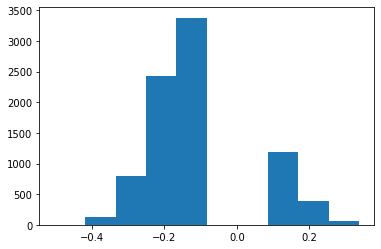

In [50]:
plt.hist(df_prad_regions["mean methylation difference"])


(array([5.665e+03, 1.985e+03, 4.560e+02, 1.440e+02, 7.200e+01, 3.700e+01,
        1.900e+01, 1.000e+01, 2.000e+00, 1.000e+00]),
 array([   6. ,  545.4, 1084.8, 1624.2, 2163.6, 2703. , 3242.4, 3781.8,
        4321.2, 4860.6, 5400. ]),
 <a list of 10 Patch objects>)

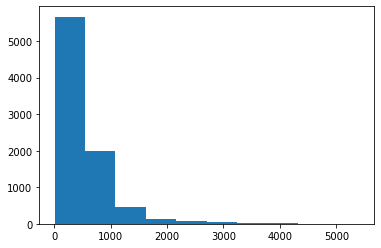

In [51]:
plt.hist(df_prad_regions["stop"]-df_prad_regions["start"])


In [4]:
from collections import defaultdict
# load probe metadata
probe_metadata = pickle.load(open("./df_keep_probes_metadata.pkl", "rb"))
probe_metadata

# make probe metadata into a dict by chrm
probe_dict = defaultdict(list)
for i, row in probe_metadata.iterrows():
    probe_dict[row.Chromosome].append((i, int(row.Start), int(row.End)))

In [5]:
def calc_region_averages(chrom, df_clean_regions, df_tcga_probes, probe_dict, title):
    
    region_stats = {}
    i=0
    region_avs_list = []
    region_names = []
    # for region in infile:
    for i,region in df_clean_regions.iterrows():
        #print(region)
        if i % 100 == 0:
            print(i)
        # determine which probes are in the region
        probes = []
        for name, start, stop in probe_dict[region.chrom]:
            if int(start) >= int(region.start) and int(stop) <= int(region.end):
                if name in df_tcga_probes.index:
                    probes.append(name)
        print(probes)
        if len(probes)>0:
            region_names.append(region.real_name)
            df_tcga_subset = df_tcga_probes.loc[probes,:]
            #print(df_tcga_subset.head)
            sample_averages = df_tcga_subset.astype(float).mean(axis=0, skipna=True)
            #print(sample_averages[0:5])
            region_avs_list.append(sample_averages)

            sample_stdvs = df_tcga_subset.std(axis=0, skipna=True)
            pct_samples_meth = sum([m >= 0.2 for m in sample_averages])/len(df_tcga_subset)
            mean_sample_stdv = np.mean(sample_stdvs)

            region_stats[region.real_name] = {"pct_samples_meth":pct_samples_meth,
                                        "mean_sample_stdv": mean_sample_stdv,
                                    "sample_average_beta": np.mean(sample_averages)}
            i += 1
        else:
            continue
    
    # compile each list of region averages per sample into a matrix for heatmap
    df_region_avs = pd.DataFrame(region_avs_list) #regions by samples
    df_region_avs.colunns = df_tcga_probes.columns
    df_region_avs.index = region_names
    

    df_region_avs = df_region_avs.fillna(0)
    print(df_region_avs.head())

    with open(f"/home/billiegould/src/Methyl/PRAD/{title}.csv","w") as fout:
        df_region_avs.to_csv(fout)
        
    with open(f"/home/billiegould/src/Methyl/PRAD/{title}_summary_stats.pkl","w") as fout:
        region_dict = pd.DataFrame(region_stats)
        region_dict.to_csv(fout, index=None)
    
    print("Complete") 
    return df_region_avs, region_stats

In [21]:
df_prad_regions = df_prad_regions.rename(columns={"chr":"chrom", "stop":"end"})
df_prad_regions["real_name"]=df_prad_regions["chrom"].astype(str) + ":" + df_prad_regions["start"].astype(str) + ":"+ df_prad_regions["end"].astype(str)

df_prad_regions_hyper = df_prad_regions[df_prad_regions["mean methylation difference"]<0]
print(df_prad_regions_hyper.shape)

df_prad_regions.head()

(6748, 11)


,chrom,start,end,q-value,mean methylation difference,#CpGs,p (MWU),p (2D KS),mean g1,mean g2,real_name
0,chr1,925544,925797,2.210000e-10,-0.151735,3,4.318800e-14,4.033600e-12,0.022788,0.17452,chr1:925544:925797
1,chr1,970607,971113,2.805200e-15,-0.218132,3,4.096700e-14,2.848400e-17,0.304080,0.52221,chr1:970607:971113
2,chr1,981482,981869,3.304600e-06,0.151178,3,1.390000e-12,1.085900e-07,0.648810,0.49763,chr1:981482:981869
3,chr1,998304,998656,5.894500e-05,-0.114840,3,6.567900e-09,2.425700e-06,0.216200,0.33104,chr1:998304:998656
4,chr1,1006914,1007118,1.074200e-09,-0.164211,6,4.174400e-14,2.133200e-11,0.466600,0.63081,chr1:1006914:1007118


In [43]:
print(list(df_prad_regions.columns))
df_prad_regions = df_prad_regions.sort_values(["p (2D KS)"], ascending=True)

df_prad_regions.head()

prad_regions_top = df_prad_regions["real_name"].values[0:100]

df_prad_regions = df_prad_regions.sort_values(["mean methylation difference"], ascending=False)
prad_regions_top_mean = df_prad_regions["real_name"].values[0:100]


['chrom', 'start', 'end', 'q-value', 'mean methylation difference', '#CpGs', 'p (MWU)', 'p (2D KS)', 'mean g1', 'mean g2', 'real_name']


In [7]:
df_met.index = probe_metadata.index
df_met = df_met.drop(["chr","pos"], axis=1)
df_met = df_met.replace(".", np.nan)


In [ ]:
# test: # df_prad_region_avs, region_stats = calc_region_averages("chr21",df_prad_regions[df_prad_regions["chrom"]=="chr22"], df_met, probe_dict, "PRAD_TCGA_region_avs_chr22")

In [8]:
from daikon.parallel import Pool

with Pool(cpu=22, memory='60GB') as pool:
    jobs = [pool.apply_async(calc_region_averages, 
                             chrom=chrom, 
                             df_clean_regions=df_prad_regions[df_prad_regions["chrom"]==chrom], 
                             df_tcga_probes=df_met, 
                             probe_dict=probe_dict, 
                             title=f"PRAD_region_avs_chr{chrom}") for chrom in set(df_prad_regions["chrom"])]
    results = pool.gather(jobs)
    

<KubernetesCluster: uid=8bde0822-83f1-4b9e-8f41-6d76f6901431 workers='0 - 100' cpu=22 memory='60.00 GB' preemptible=True>

/home/billiegould/.virtualenvs/research/lib/python3.8/site-packages/distributed/worker.py:3373: UserWarning: Large object of size 2.41 GB detected in task graph: 
  {'chrom': 'chr6', 'df_clean_regions':      chrom   ... n_avs_chrchr6'}
Consider scattering large objects ahead of time
with client.scatter to reduce scheduler burden and 
keep data on workers

    future = client.submit(func, big_data)    # bad

    big_future = client.scatter(big_data)     # good
    future = client.submit(func, big_future)  # good
  warnings.warn(
100%|██████████| 22/22 [09:05<00:00, 24.81s/it, Succeeded: 22, Failed: 0, Last: calc_region_averages-fe47089142eeac669132223e89a595a1]


In [10]:
dfs=[]
for file in [ f"./PRAD_region_avs_chr{chrom}.csv" for chrom in set(df_prad_regions["chrom"])]:
    df = pd.read_csv(file, index_col=0)
    dfs.append(df)
df_heatmap = pd.concat(dfs, axis=0)

print(df_heatmap.shape)
print(df_heatmap.head())

(8391, 277)
                      g1_TCGA-G9-6499-11A-02D-1963-05  \
chr6:363422:364068                           0.481248   
chr6:391113:392555                           0.351291   
chr6:393109:393616                           0.495689   
chr6:710834:711405                           0.035372   
chr6:1180141:1180318                         0.793258   

                      g1_TCGA-G9-6356-11A-01D-1787-05  \
chr6:363422:364068                           0.344438   
chr6:391113:392555                           0.411613   
chr6:393109:393616                           0.418933   
chr6:710834:711405                           0.020334   
chr6:1180141:1180318                         0.808417   

                      g1_TCGA-EJ-7331-11A-01D-2116-05  \
chr6:363422:364068                           0.358754   
chr6:391113:392555                           0.478523   
chr6:393109:393616                           0.413330   
chr6:710834:711405                           0.019735   
chr6:1180141:1180

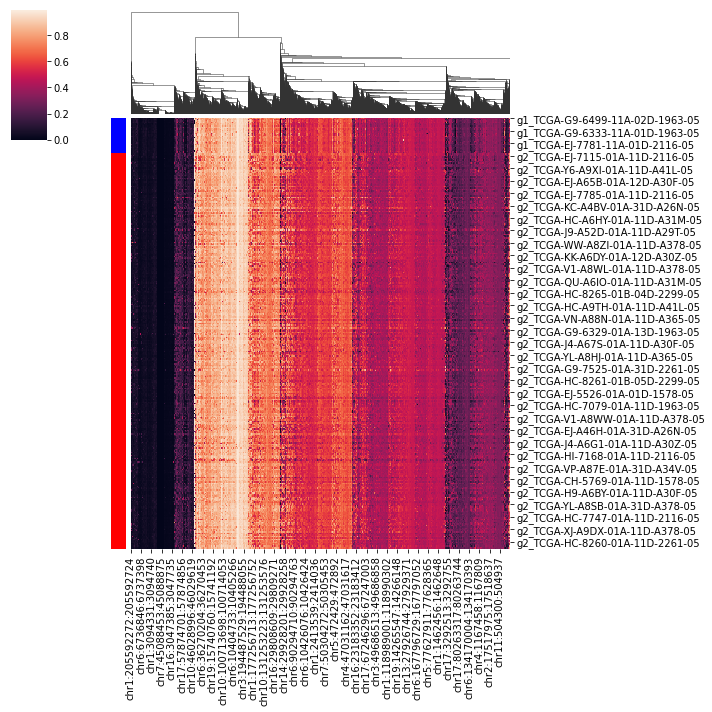

In [16]:

colors = [ ["blue"]*23 + ["red"]*(277-23)]
sns.clustermap(df_heatmap.T,
              row_colors = colors,
               row_cluster=False)

(100, 277)


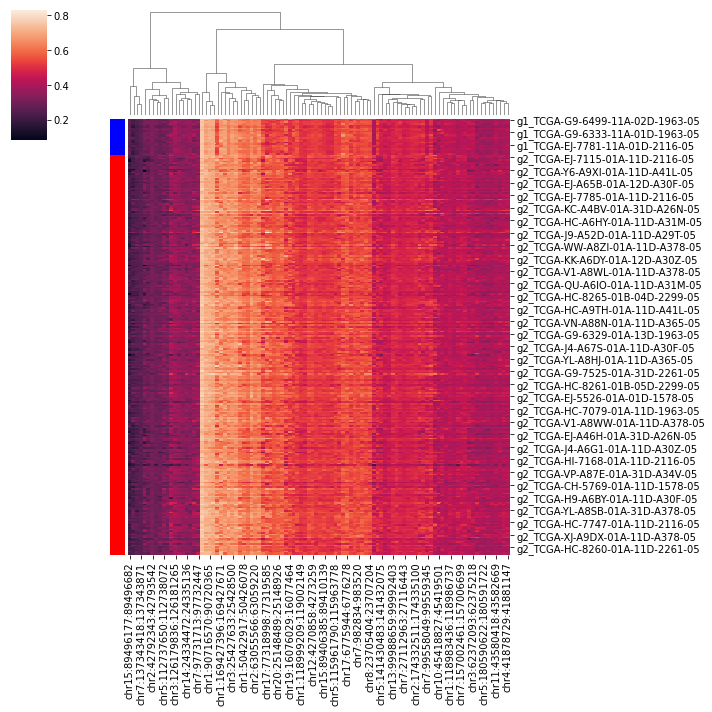

In [42]:
df_heatmap_top = df_heatmap.loc[prad_regions_top,:]
print(df_heatmap_top.shape)
colors = [ ["blue"]*23 + ["red"]*(277-23)]
sns.clustermap(df_heatmap_top.T,
              row_colors = colors,
               row_cluster=False)

(100, 277)


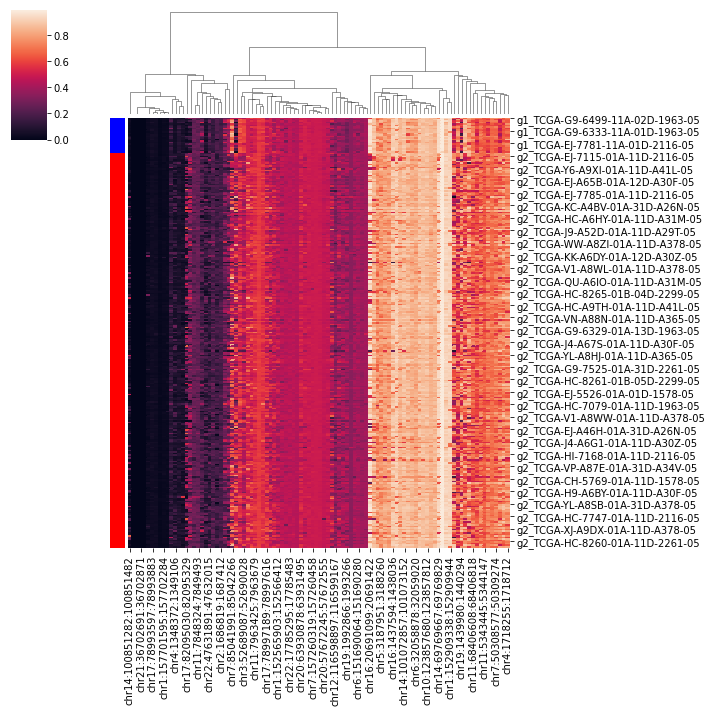

In [44]:
df_heatmap_top = df_heatmap.loc[prad_regions_top_mean,:]
print(df_heatmap_top.shape)
colors = [ ["blue"]*23 + ["red"]*(277-23)]
sns.clustermap(df_heatmap_top.T,
              row_colors = colors,
               row_cluster=False)

In [45]:
df_prad_regions.head()

,chrom,start,end,q-value,mean methylation difference,#CpGs,p (MWU),p (2D KS),mean g1,mean g2,real_name
605,chr1,157700429,157701035,2.366100e-22,0.336558,4,4.996000e-14,1.052700e-24,0.81412,0.47756,chr1:157700429:157701035
2322,chr12,132777260,132777824,5.579800e-19,0.329967,3,4.096700e-14,3.655300e-21,0.83470,0.50473,chr12:132777260:132777824
5615,chr3,56683691,56683776,1.791700e-20,0.322725,4,4.207700e-14,1.002500e-22,0.78785,0.46513,chr3:56683691:56683776
4061,chr19,1439980,1440294,1.991100e-24,0.321154,4,4.396500e-14,6.895400e-27,0.77408,0.45293,chr19:1439980:1440294
620,chr1,159008677,159009167,1.691500e-15,0.319167,3,4.152200e-14,1.669300e-17,0.80955,0.49038,chr1:159008677:159009167
